Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
from ComputeDispRel import evaluate_LHW, evaluate_IBWs

Define plasma parameters

In [2]:
# Define plasma parameters
B = 3
Te = 500*c.electron_volt
Ti = 500*c.electron_volt
ne = 1e19
ni = 1e19

# single ion species deuterium
mi = 2*1836*c.m_e 
Zi = 1

# Calculate ion Larmor radius
vTi = np.sqrt(2.0*Ti/mi)
omgci = Zi*c.e*B/mi
rho_i = vTi/omgci

Choose dispersion relation

In [3]:
# 'D_IBW'               standard electrostatic IBW (eq. (1) with K_sigma form eq. (3))
# 'D_IBW_modified'      modified electromagnetic IBW (eq. (25) with K_sigma form eq. (3))

# 'D_cold'              Cold Electromagntic lower hybrid wave (eq. (23))
# 'D_LH'                Electromagntic lower hybrid wave (eq. (26))
# 'D_LH_electrostatic'  Electrostatic lower hybrid wave (eq. (21))
# 'D_LH_approx'         Approximate dispersion relation for electromagnetic LH wave (eq. 27)

Evaluate and plot lower hybrid wave

In [3]:
# minimum and maximum wavenumber
k_min = 100
k_max = 8000

# k resolution
k_res = 1000

k_LH_cold, omg_LH_cold = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH_cold')
k_LH_EM, omg_LH_EM = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH')
k_LH_approx, omg_LH_approx = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH_approx')
k_LH_ES, omg_LH_ES = evaluate_LHW(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, dispersion_relation='D_LH_electrostatic')

Evaluating D_LH_cold
Evaluating D_LH
Evaluating D_LH_approx
Evaluating D_LH_electrostatic


(16.0, 24.0)

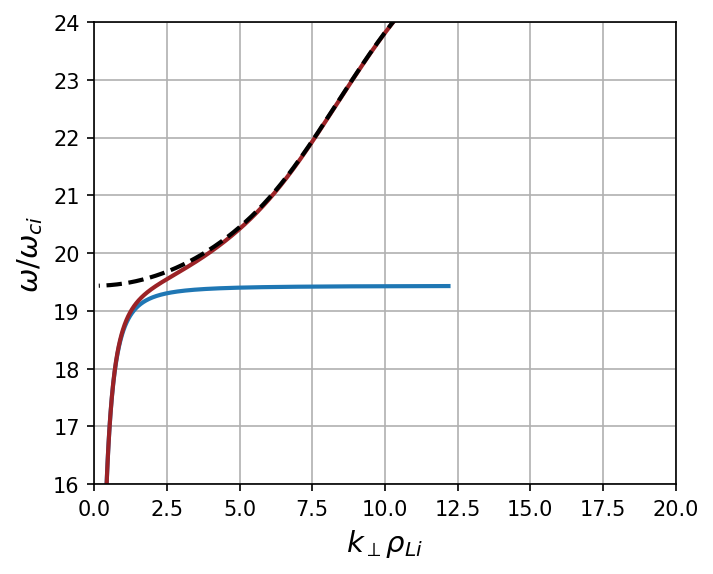

In [4]:
plt.figure(figsize=(5,4), dpi = 150)
plt.grid()
plt.plot(k_LH_cold*rho_i, omg_LH_cold/omgci, linewidth=2, linestyle = '-', color='tab:blue')
plt.plot(k_LH_EM*rho_i, omg_LH_EM/omgci, linewidth=2, linestyle = '-', color='#9B2226')
#plt.plot(k_LH_approx*rho_i, omg_LH_approx/omgci, linewidth=2, linestyle = '-', color='#EE9B00')
plt.plot(k_LH_ES*rho_i, omg_LH_ES/omgci, linewidth=2, linestyle = '--', color='k')
plt.xlabel(r'$k_\perp\rho_{Li}$',fontsize=14)
plt.ylabel(r'$\omega/\omega_{ci}$',fontsize=14)
plt.xlim(0,20)
plt.ylim(16, 24)

Evaluate and plot ion Bernstein waves

In [5]:
# minimum and maximum wavenumber
# maximum wavenumber must be well above the LH wave
k_min = 50
k_max = 15000

# k resolution
k_res = 2000

# minimum and maximum ion cyclotorn harmonic
N_min = 15
N_max= 26

# evaluate wavenumbers
k_IBW, omg_IBW = evaluate_IBWs(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, N_min, N_max, dispersion_relation='D_IBW')
k_IBW_modified, omg_IBW_modified = evaluate_IBWs(ne, ni, Te, Ti, B, mi, Zi, k_min, k_max, k_res, N_min, N_max, dispersion_relation='D_IBW_modified')

Evaluating D_IBW
Lower hybrid branch is at the 19.0th ion cyclotron harmonic


C:\Users\aclpe\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Evaluating D_IBW_modified
Lower hybrid branch is at the 19.0th ion cyclotron harmonic


(16.0, 24.0)

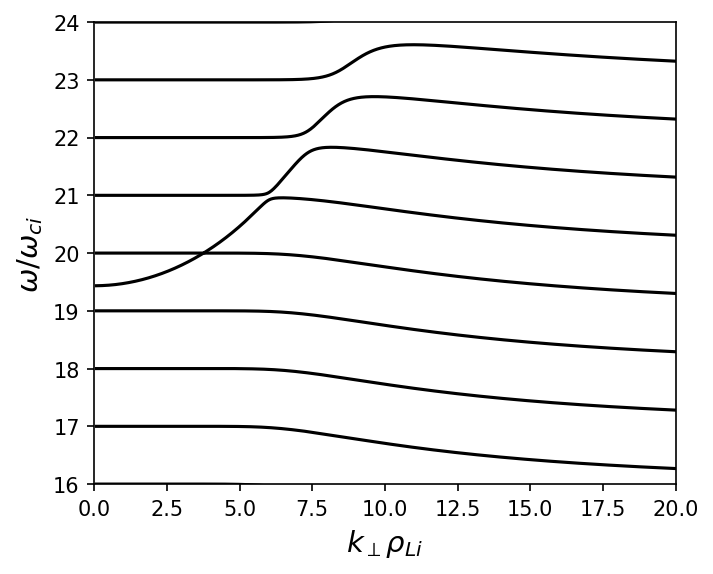

In [6]:
N_harmonics = N_max - N_min + 1
plt.figure(figsize=(5,4), dpi = 150)
for i in range(N_harmonics):
    plt.plot(k_IBW[:]*rho_i, np.array(omg_IBW[i,:])/omgci, color='k', linewidth=1.5, linestyle = '-')
plt.xlabel(r'$k_\perp\rho_{Li}$',fontsize=14)
plt.ylabel(r'$\omega/\omega_{ci}$',fontsize=14)
plt.xlim(0,20)
plt.ylim(16, 24)

(16.0, 24.0)

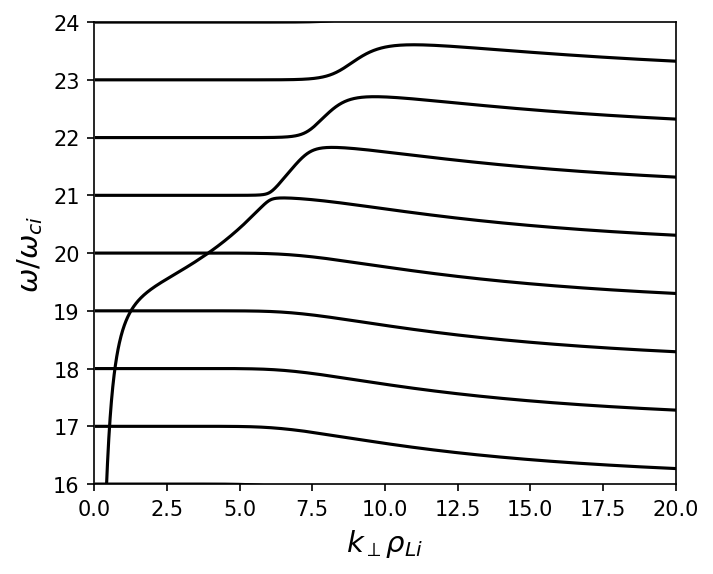

In [7]:

N_harmonics = N_max - N_min + 1
plt.figure(figsize=(5,4), dpi = 150)
for i in range(N_harmonics):
    plt.plot(k_IBW_modified[:]*rho_i, np.array(omg_IBW_modified[i,:])/omgci, color='k', linewidth=1.5, linestyle = '-')
plt.xlabel(r'$k_\perp\rho_{Li}$',fontsize=14)
plt.ylabel(r'$\omega/\omega_{ci}$',fontsize=14)
plt.xlim(0,20)
plt.ylim(16, 24)